<h1><center>CSE391 programming for data science</center></h1>

<h1><center>Lecture 18</center></h1>
<h1><center>April 16 ,2018 </center></h1>




# Supervise learning :  Simple Linear regression
##  Regression is the attempt to explain the variation in a dependent variable using the variation in independent variables.

## Regression is thus an explanation of causation. If the independent variable(s) sufficiently explain the variation in the dependent variable, the model can be used for prediction. 
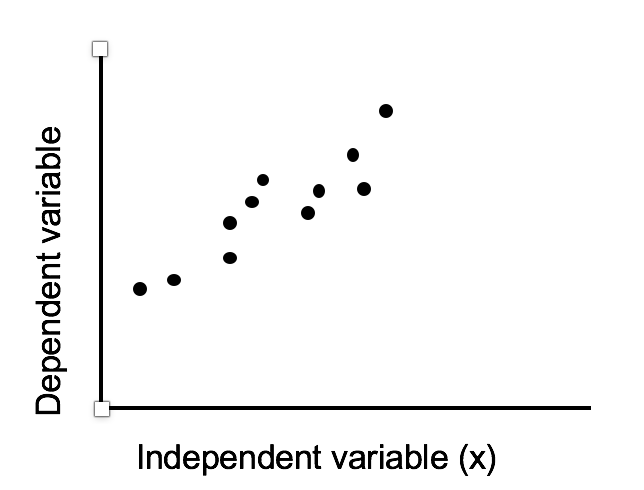

## The output of a regression is a function that predicts the dependent variable based upon values of the independent variables.

## Simple regression fits a straight line to the data.

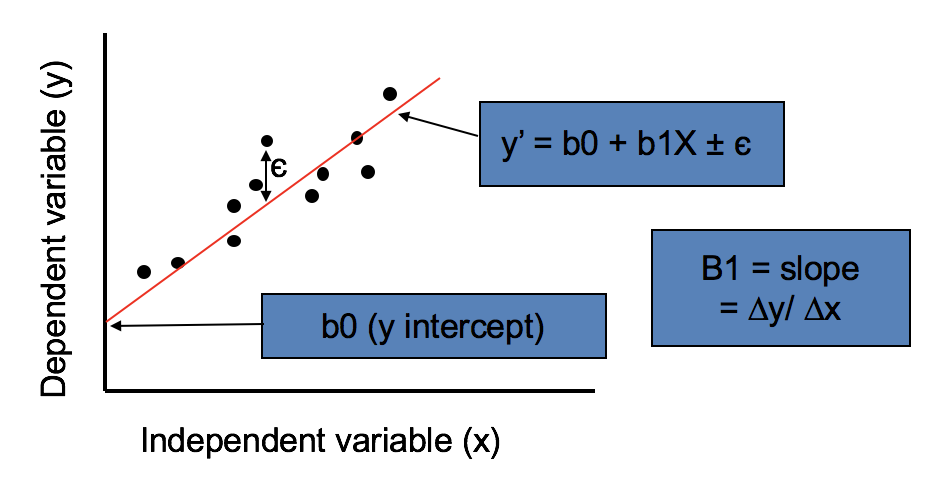


## The function will make a prediction for each observed data point. 
## The observation is denoted by y and the prediction is denoted by y.
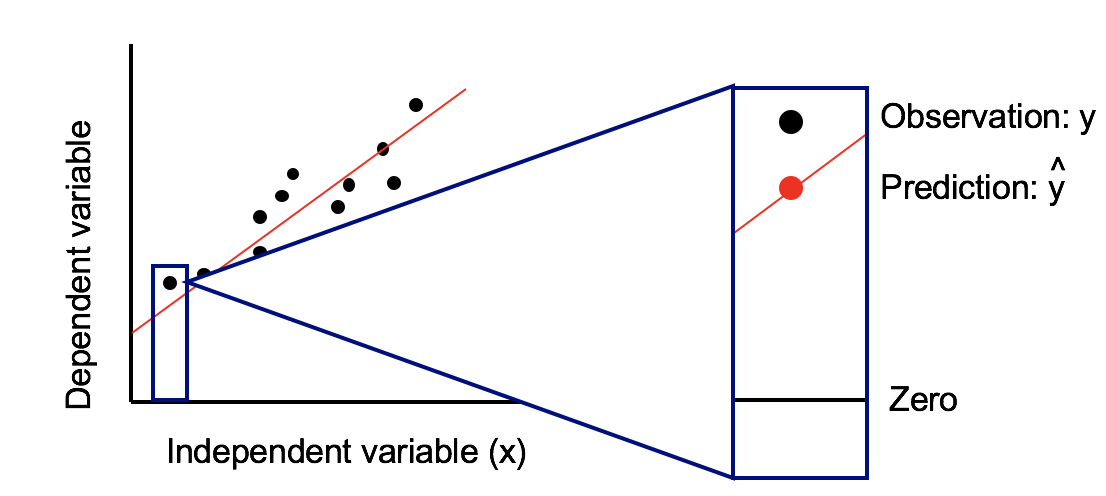


# Terminology
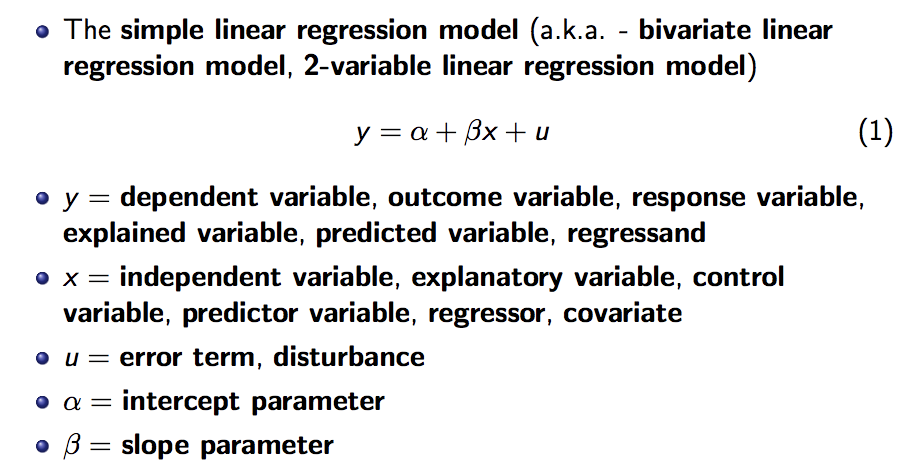
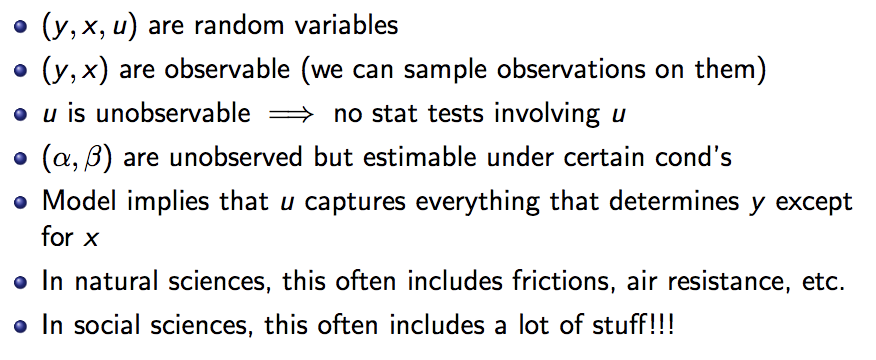


# Ordinary least square  (OLS): A method to solve linear regression

  $\huge min_{\alpha, \beta} \| y-\alpha-\beta x\|^2$


        
         
        


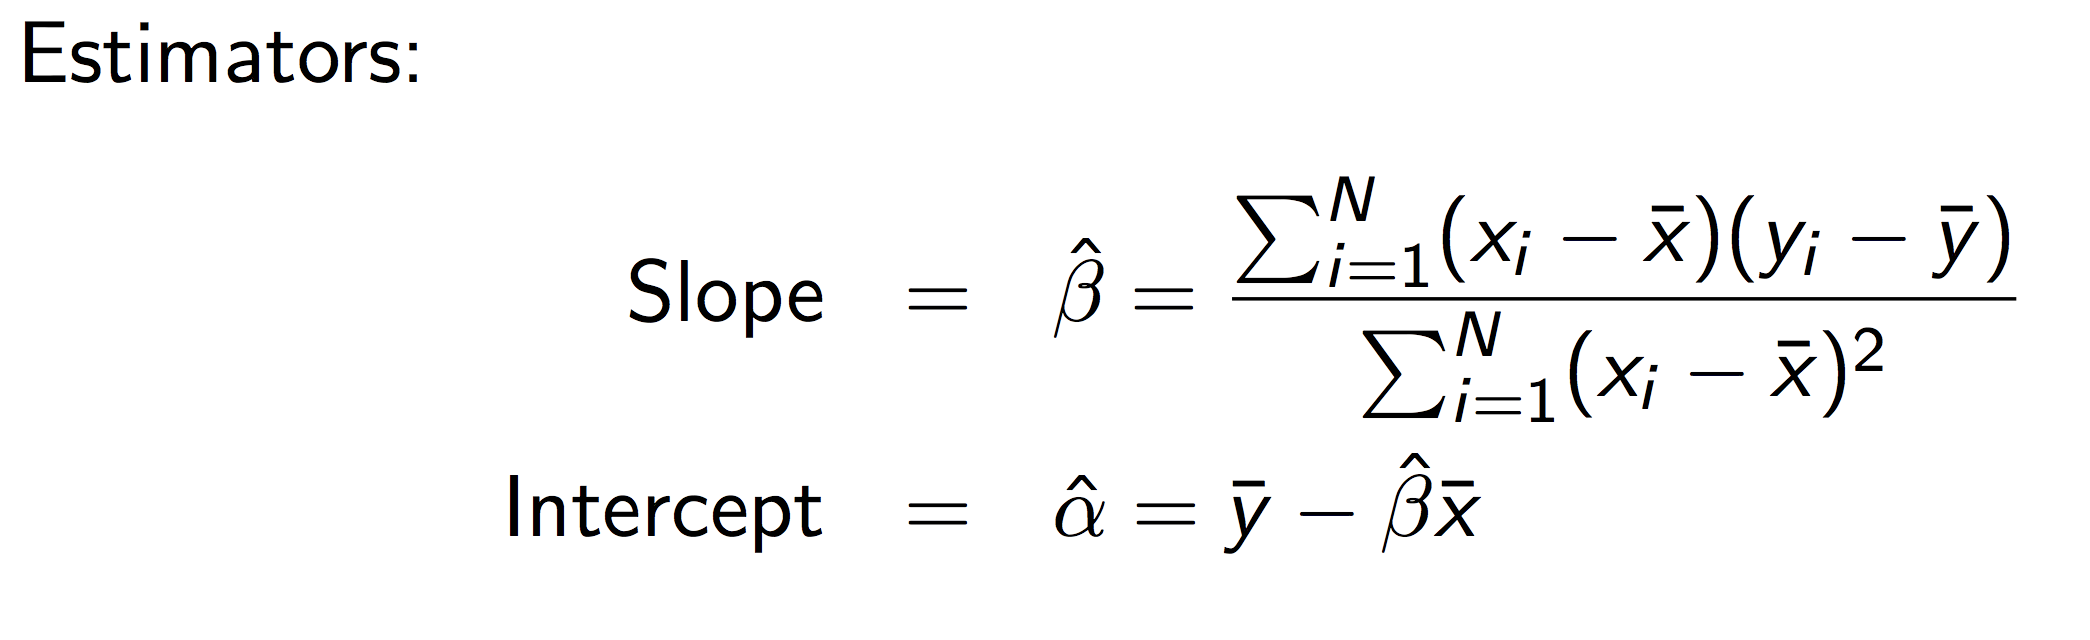

# Multiple Linear Regression (MLR)
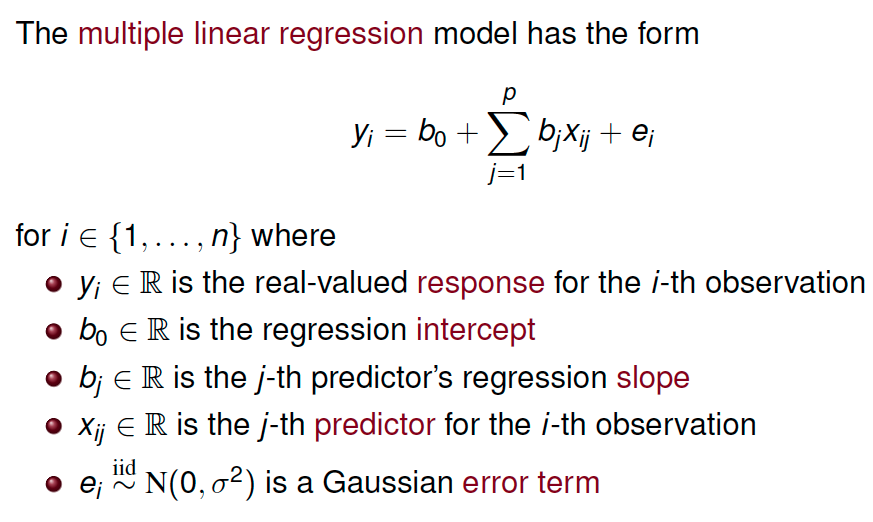

[SRC](http://users.stat.umn.edu/~helwig/)

# Some Terminologies:
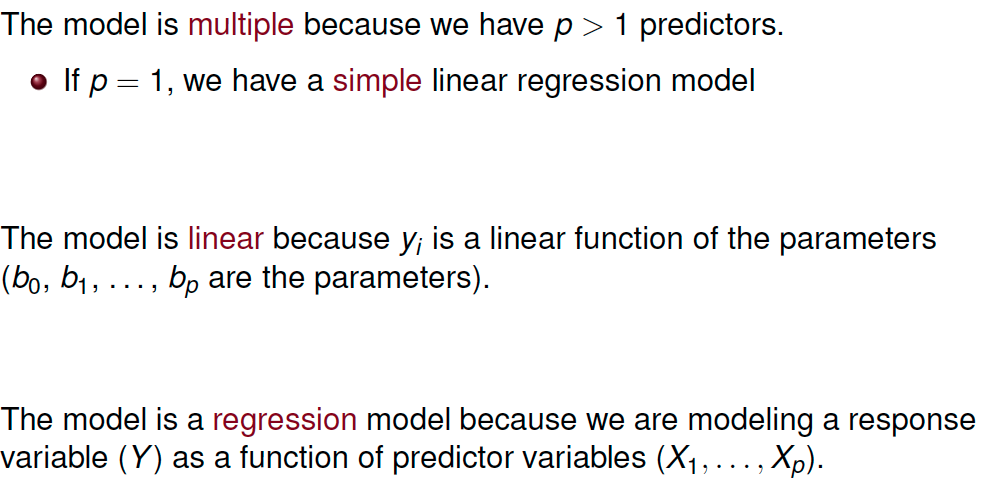

# Some assumptions

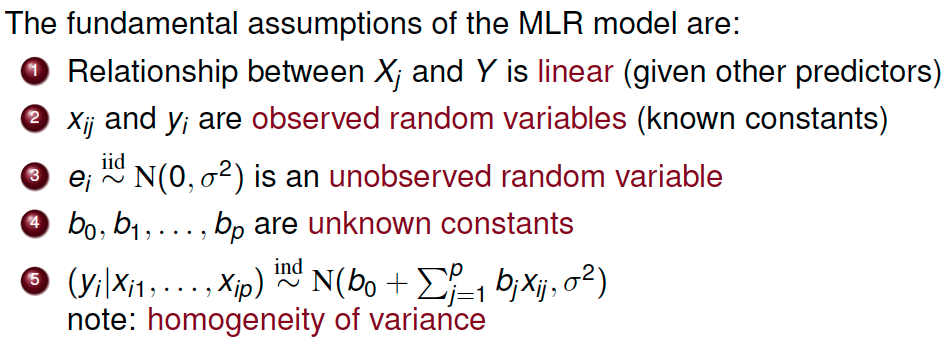

# Matrix form
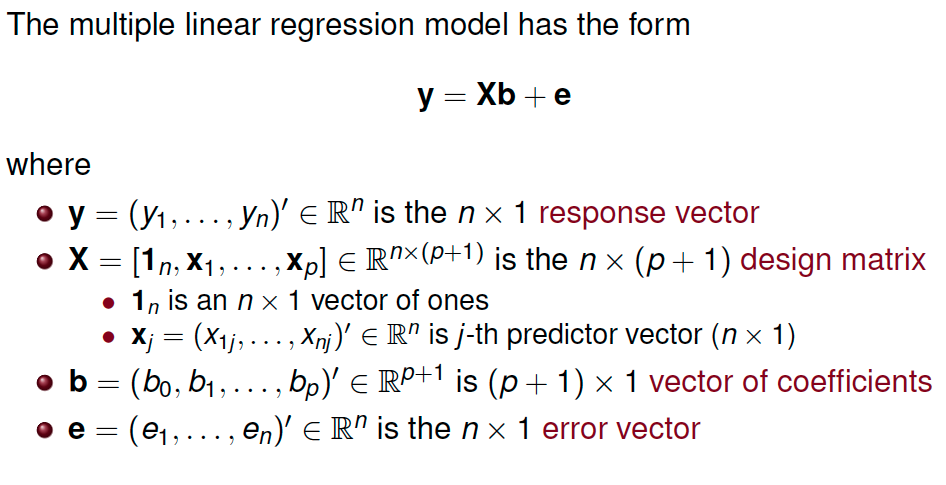

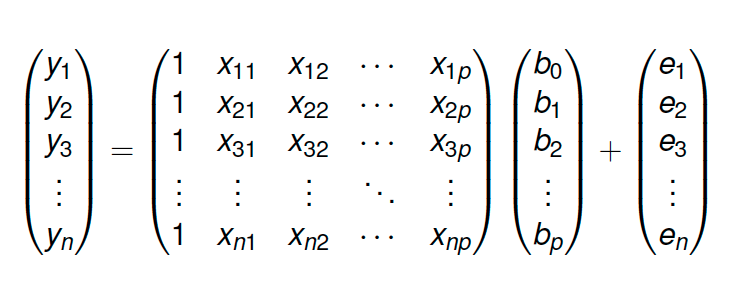

# How to solve MLR : Using Ordinary Least Squares
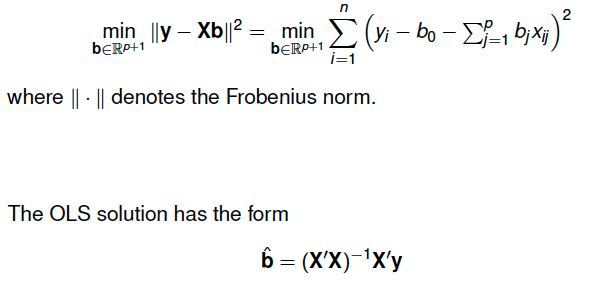

# Let's do a simple linear regression example in Python

## main class

## class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

## Example:

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
R-squared = : 0.47


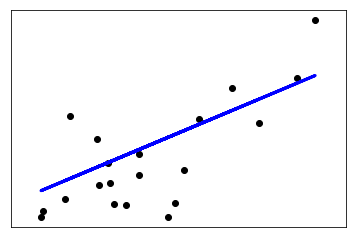

In [21]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()



# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared = : %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Example: Multiple Linear Regression (MLR)

(506, 13)


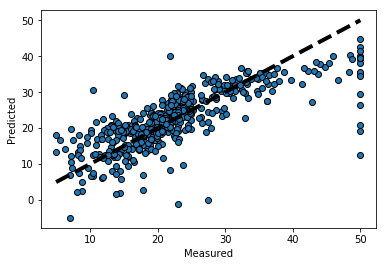

R-squared = : 0.59


In [22]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target
print(boston.data.shape)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# R-squared: 
print('R-squared = : %.2f' % r2_score(y, predicted))

# Regression Model Evaluation metrics:
## R-squared and the Goodness-of-Fit
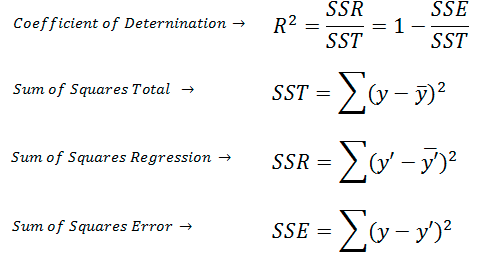
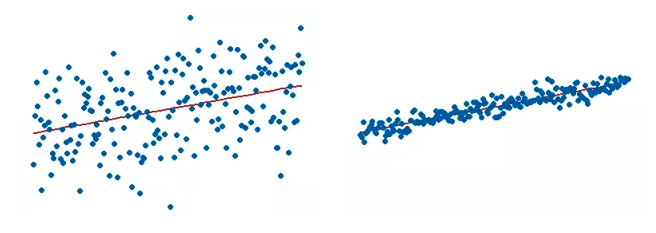
- left : bad fit( low $R^2$) right: good fit (high $R^2$)
## Root Mean Squared Error
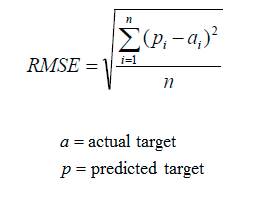
## Analysis of residuals
- Residual = Observed – Predicted
- Below figure shows a good fit:
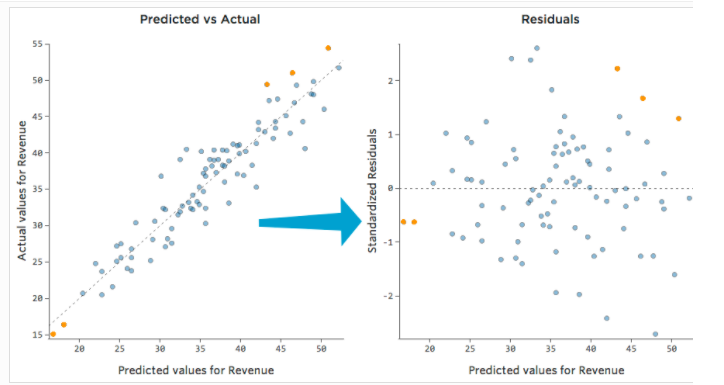

Below are some BAD residual plots that don’t meet those requirements:
    - they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot
    - they’re clustered around the lower single digits of the y-axis (e.g., 0.5 or 1.5, not 30 or 150)
    - in general there aren’t clear patterns
    
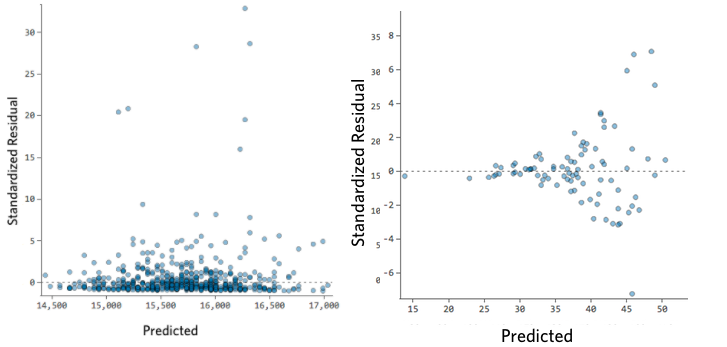

In [23]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [24]:
#R² score, the coefficient of determination
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)  

0.94860813704496794

# Multicollinearity in regression and how to mitigate its effect
## Multicollinearity is a condition in which at least 2 independent variables are highly linearly correlated.  It will often crash computers.
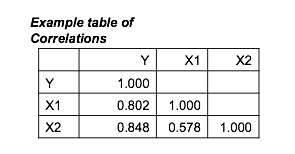

### A correlations table can suggest which independent variables may be significant.  Generally, an ind. variable that has more than a .3 correlation with the dependent variable and less than .7 with any other ind. variable can be included as a possible predictor.



# Ridge Regression ( AKA Linear least squares with l2 regularization.
## Ridge regression addresses some of the problems of Ordinary Least Squares, mainly multicollinearity, by imposing a penalty on the size of coefficients.

## Ridge regression does it by Regularization or penalize the coefficients to grow large.

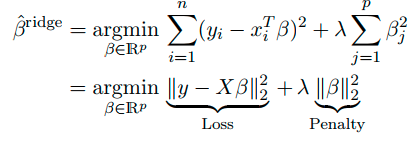

### Ridge regression is used to create a parsimonious model in the following scenarios.

1. The number of predictor variables in a given set exceeds the number of observations

2. The dataset has multicollinearity (that is correlations between predictor variables).


Perhaps the most important issue in ridge regression is the approach to determine <font color =red >penality coefficient</font>.

### A warm up example about ridge regression

In [27]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

print(reg.coef_)
print(reg.intercept_) 


[ 0.34545455  0.34545455]
0.136363636364


# Object class for ridge
# class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)¶


## Ridge example:
### Plot Ridge coefficients as a function of the L2 regularization¶

Automatically created module for IPython interactive environment


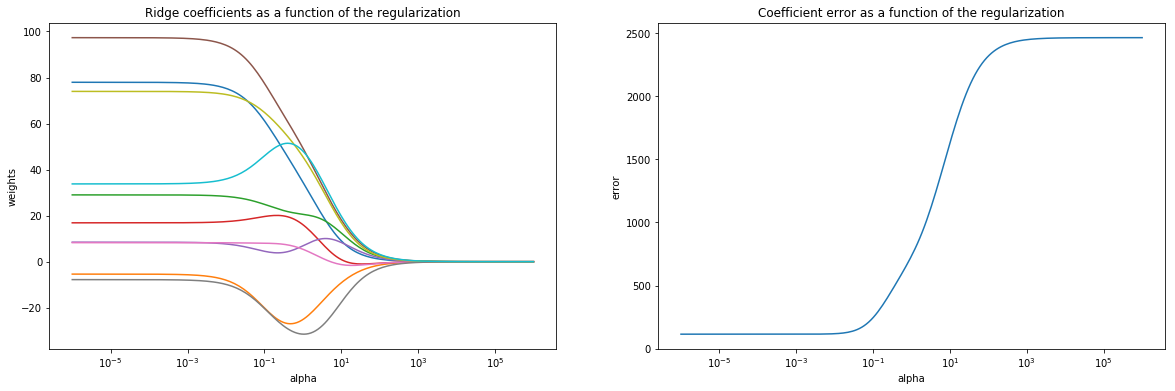

In [28]:
# Author: Kornel Kielczewski -- <kornel.k@plusnet.pl>

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

/Users/martin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


r2


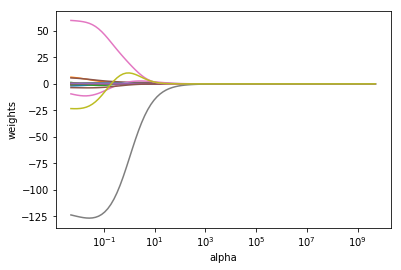

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

from sklearn.cross_validation import KFold, ShuffleSplit
df = pd.read_csv('/Users/martin/Documents/MyLecturesSBU/spring2018/CSE391/data/Hitters.csv').dropna()
df.dropna(axis =0)
#df.head()

dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])


y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
#X.info()

alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

n_samples = X.shape[0]


cv2 = ShuffleSplit(n_samples, test_size=.2, n_iter=20)

RiCV = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring= 'r2', cv=None, gcv_mode=None, store_cv_values=True)
RiCV.fit(X,y)
print(RiCV.scoring)

Interior gateway protocols type 1, link-state routing protocols, such as OSPF and IS-IS
Interior gateway protocols type 2, distance-vector routing protocols, such as Routing Information Protocol, RIPv2, IGRP.
Exterior gateway protocols are routing protocols used on the Internet for exchanging routing information between Autonomous Systems, such as Border Gateway Protocol (BGP), Path Vector Routing Protocol. Exterior gateway protocols should not be confused with Exterior Gateway Protocol (EGP), an obsolete routing protocol.

when $\lambda$ is zero, 